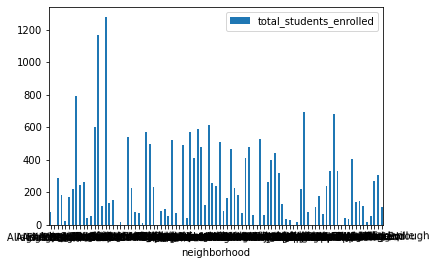

In [4]:
import numpy as np
import pandas as pd

#Read in the student enrollment data
school= pd.read_csv("enrollment.csv")

#Drop ethnicity-based data columns to focus on total student enrollment
student_enrollment = school.drop(columns=['african_american','american_indian','asian__not_pacific_islander', 
                    'hispanic','multiracial','native_hawaiian_or_other_pacific_islander', 'white'])


#Group rows of data pertaining to the same neighborhood together and sum their student enrollment totals
newb=student_enrollment.groupby(student_enrollment['neighborhood']).aggregate({'total_students_enrolled': 'sum'})

#Sort student enrollment totals by neighborhood from high to low
newb.sort_values('total_students_enrolled', ascending=False)


#Create bar graph of student enrollment by neighborhood
newb.plot.bar(x=None,y='total_students_enrolled',rot=1)

This representation is too cluttered and ineffective due to the overlapping axis labels. Regardless, it serves to demonstrate that Carrick has the  highest total number of students enrolled out of all the neighborhoods surveyed. It is closely followed by Brookline and Beechview. All of these neighborhoods are geographically located south of central Pittsburgh, across the Monongahela River.

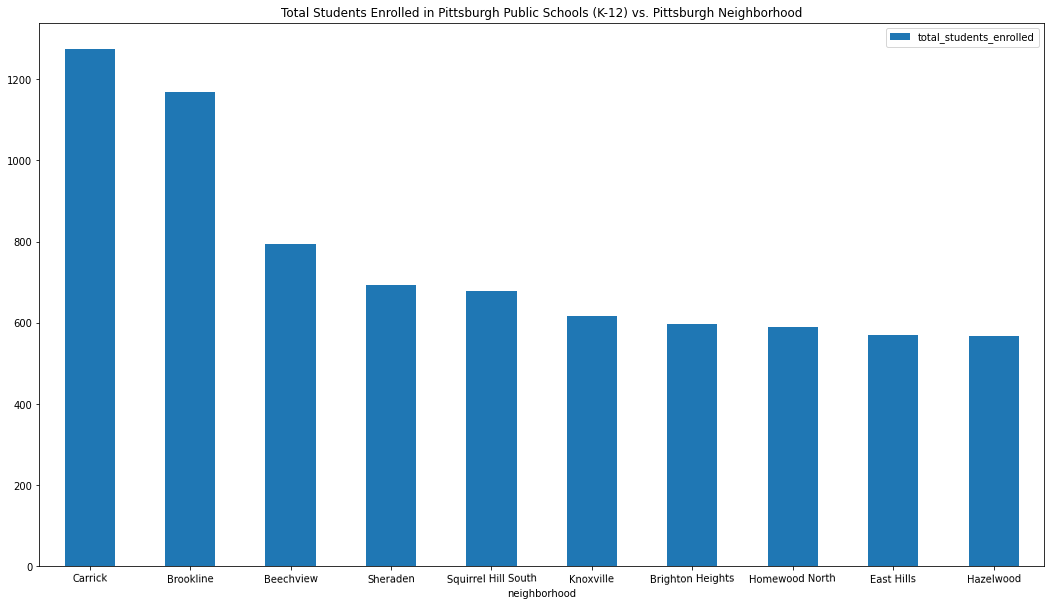

In [53]:
import numpy as np
import pandas as pd

#Read in the student enrollment data
school= pd.read_csv("enrollment.csv")

#Drop ethnicity-based data columns to focus on total student enrollment
student_enrollment = school.drop(columns=['african_american','american_indian','asian__not_pacific_islander', 
                    'hispanic','multiracial','native_hawaiian_or_other_pacific_islander', 'white'])


#Group rows of data pertaining to the same neighborhood together and sum their student enrollment totals
newb=student_enrollment.groupby(student_enrollment['neighborhood']).aggregate({'total_students_enrolled': 'sum'})

#Sort student enrollment totals by neighborhood from high to low
newb2=newb.sort_values('total_students_enrolled', ascending=False)

newb3=newb2.head(10)

#Create bar graph of student enrollment by neighborhood
newb3.plot.bar(figsize=(18,10), x=None, y='total_students_enrolled',rot=1, title="Total Students Enrolled in Pittsburgh Public Schools (K-12) vs. Pittsburgh Neighborhood")

The adapted bar graph is much more readable for the user. This plot continues to demonstrate that the Carrick neighborhood carries the highest student enrollment (K-12) in Pittsburgh.

total_students_enrolled        589.0
african_american               551.0
asian__not_pacific_islander      0.0
hispanic                         0.0
multiracial                     11.0
white                            0.0
Name: Homewood North, dtype: float64
--> Non-white majority neighborhood (+1)
total_students_enrolled        1276.0
african_american                362.0
asian__not_pacific_islander     157.0
hispanic                         37.0
multiracial                     156.0
white                           546.0
Name: Carrick, dtype: float64
--> No ethnicity group holds a supermajority (+1)
total_students_enrolled        794.0
african_american               187.0
asian__not_pacific_islander      0.0
hispanic                       177.0
multiracial                     81.0
white                          326.0
Name: Beechview, dtype: float64
--> No ethnicity group holds a supermajority (+1)
total_students_enrolled        1276.0
african_american                362.0
asian__not_p

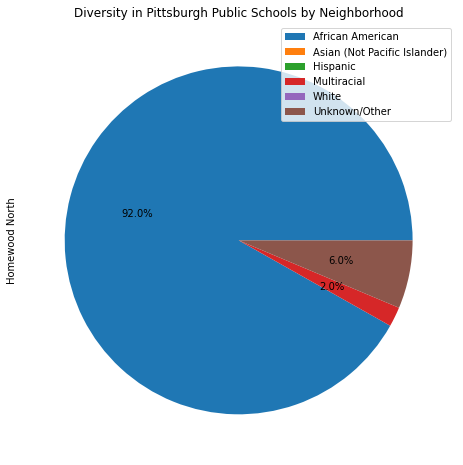

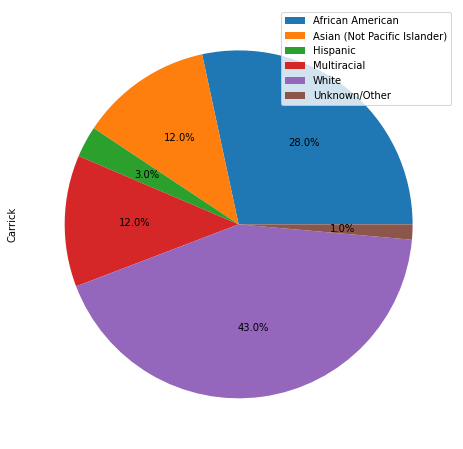

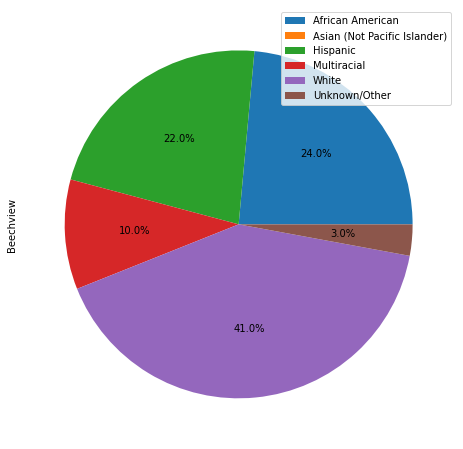

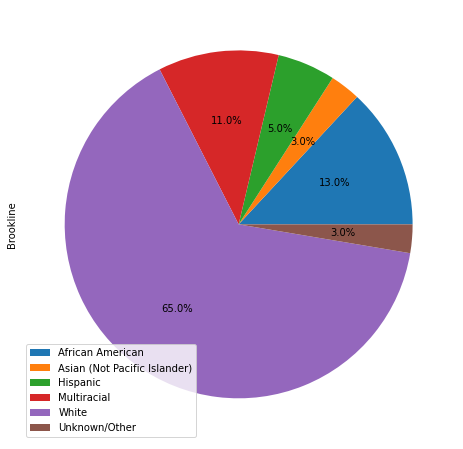

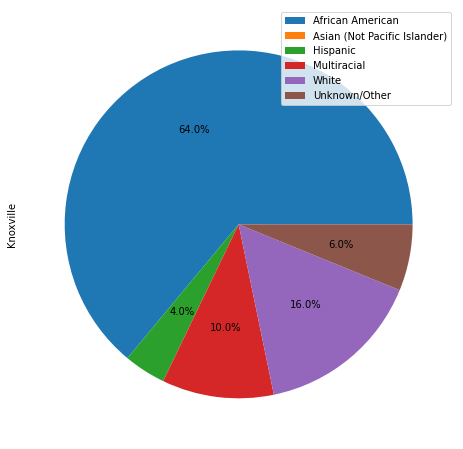

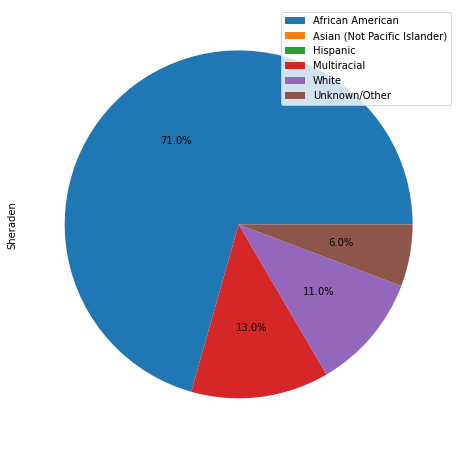

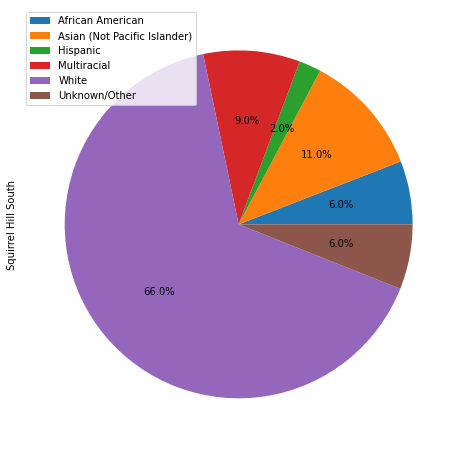

In [144]:
import pandas as pd


#Create initial data frame using data read from Pittsburgh Public School Enrollment Data
school= pd.read_csv("enrollment.csv")

        
#Remove irrelevant columns (in regards to diversity)
newb2=school.drop(columns=['student_count_redactions','grade_level','attending_feeder','attending_nonfeeder','total_with_feeder_status','feeder_count_redactions','american_indian','native_hawaiian_or_other_pacific_islander'])


#Group data from the same neighborhood together (disregard grade level distinctions)
newb3=newb2.groupby(newb2['neighborhood']).aggregate({'total_students_enrolled': 'sum','african_american':'sum','asian__not_pacific_islander':
                                             'sum','hispanic':'sum','multiracial':'sum','white':'sum'}) 


#Initialize variables to hold point values
homewood_points=0
carrick_points=0
beechview_points=0
brookline_points=0
knoxville_points=0
sheraden_points=0

#Determine the maximum student enrollment values per ethnicity
afr_am_max=newb3['african_american'].max()
asia_n_pac_isl_max=newb3['asian__not_pacific_islander'].max()
hisp_max=newb3['hispanic'].max()
mult_max=newb3['multiracial'].max()
white_max=newb3['white'].max()


#Create data frame for pie chart section data
newb4 = pd.DataFrame({'Homewood North': [551.0, 0.0, 0.0, 11.0, 0.0, (589.0-551.0)],

                    'Carrick': [362.0, 157.0, 37.0, 156.0, 546.0, (1276.0-1258.0)],
                    'Beechview': [187.0, 0.0, 177.0, 81.0, 326.0,(794.0-771.0)],
                    'Brookline': [153.0, 33.0, 63.0, 131.0, 758.0, (1169.0-1138.0)],
                    'Knoxville': [394.0, 0.0, 24.0, 64.0, 96.0, (616.0-578.0)],
                    'Sheraden': [490.0, 0.0, 0.0, 89.0, 75.0, (694.0-654.0)],
                    'Squirrel Hill South': [40.0, 77.0, 14.0, 61.0, 446.0, (679.0-638.0)]},

                    index=['African American', 'Asian (Not Pacific Islander)', 'Hispanic', 'Multiracial','White','Unknown/Other'])


#Create pie charts for notable neighborhoods in regards to diversity
pie1 = newb4.plot.pie(y='Homewood North', figsize=(8, 8), autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None, title="Diversity in Pittsburgh Public Schools by Neighborhood")
pie2 = newb4.plot.pie(y='Carrick', figsize=(8,8),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)
pie3 = newb4.plot.pie(y='Beechview',figsize=(8,8),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)
pie5 = newb4.plot.pie(y= 'Brookline',figsize=(8,8),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)
pie6 = newb4.plot.pie(y= 'Knoxville',figsize=(8,8),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)
pie7 = newb4.plot.pie(y= 'Sheraden',figsize=(8,8),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None) 
pie8 = newb4.plot.pie(y= 'Squirrel Hill South',figsize=(8,8),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',labeldistance=None)


#Determine neighborhood with greatest number of African American students enrolled
x=1
y=1
for row in newb3.iterrows():
    while x<91:
        if newb3.iat[x,y]==afr_am_max:
            print(newb3.iloc[x])
        x+=1
print("--> Non-white majority neighborhood (+1)")
homewood_points+=1

        
#Determine neighborhood with greatest number of Asian (not Pacific Islander) students enrolled
x2=1
y2=2
for row in newb3.iterrows():
    while x2<91:
        if newb3.iat[x2,y2]==asia_n_pac_isl_max:
            print(newb3.iloc[x2])
        x2+=1       
print("--> No ethnicity group holds a supermajority (+1)")
carrick_points+=1
        
        
#Determine neighborhood with greatest number of hispanic students enrolled
x3=1
y3=3
for row in newb3.iterrows():
    while x3<91:
        if newb3.iat[x3,y3]==hisp_max:
            print(newb3.iloc[x3])
        x3+=1
print("--> No ethnicity group holds a supermajority (+1)")
beechview_points+=1

  
    
#Determine neighborhood with greatest number of multiracial students enrolled
x4=1
y4=4
for row in newb3.iterrows():
    while x4<91:
        if newb3.iat[x4,y4]==mult_max:
            print(newb3.iloc[x4])
        x4+=1
print("--> Greatest number of multiracial students enrolled (+1)")
carrick_points+=1


#Determine neighborhood with greatest number of white students enrolled
x5=1
y5=5
for row in newb3.iterrows():
    while x5<91:
        if newb3.iat[x5,y5]==white_max:
            print(newb3.iloc[x5])
        x5+=1


#Determine which neighborhoods have no student enrollment data and remove them (no need for empty pie charts)
newb5=newb3 
x6=1
for row in newb5.iterrows():
    while x6<91:
        if newb5.iat[x6,0]==0:
            drop_loc=x6
            newb5.iloc[x6]
        x6+=1  
newb5.drop(index=['Allegheny West', 'Central Oakland','Chateau','Esplen','Golden Triangle', 'North Oakland','Ridgemont','South Shore', 'Strip District'])

print(newb5.iloc[43])
print("--> Non-white majority neighborhood (+1)")
knoxville_points+=1
print(newb5.iloc[69])
print("--> Non-white majority neighborhood (+1)")
sheraden_points+=1
print(newb5.iloc[77])

#Create an open list to store the indices of neighborhoods with non-white majorities
nonwhite_majority_neighborhoods= []

#Determine which neighborhoods have non-white majorities and store them into the empty list
x7=1
for row in newb5.iterrows():
    while x7<91:
        if newb5.iat[x7,1]>newb5.iat[x7,5]:
            nonwhite_majority_neighborhoods.append(x7)
        elif newb5.iat[x7,2]>newb5.iat[x7,5]:
            nonwhite_majority_neighborhoods.append(x7)
        elif newb5.iat[x7,3]>newb5.iat[x7,5]:
            nonwhite_majority_neighborhoods.append(x7)
        elif newb5.iat[x7,4]>newb5.iat[x7,5]:
            nonwhite_majority_neighborhoods.append(x7)
        x7+=1

#Remove neighborhoods from the list that lack an ethnicity group entirely
count=0
for name in nonwhite_majority_neighborhoods:
    if name==43:
        nonwhite_majority_neighborhoods.pop(count)
    if name==69:
        nonwhite_majority_neighborhoods.pop(count)
    if newb5.iloc[count,1]==0 or newb5.iloc[count,2]==0 or newb5.iloc[count,3]==0 or newb5.iloc[count,4]==0:
        nonwhite_majority_neighborhoods.pop(count)
    else:
        print(newb5.iloc[count])
        print("--> This neighborhood includes members of each ethnicity group. (+1) ")
    count+=1
    
brookline_points+=1
carrick_points+=1


#Create a list to consolidate and compare point values
point_comparison=[homewood_points, carrick_points, beechview_points, brookline_points, knoxville_points, sheraden_points]

maximumpoints=max(point_comparison)
for which in point_comparison:
    if which==maximumpoints:
        winner=which
        
print("The most diverse neighborhood in Pittsburgh with " + str(maximumpoints) + " points is... Carrick")

